# UNIDADE 1: Inteligência Artificial

1.1. Fundamentos do Aprendizado de Máquina  
1.2. Tipos de Tarefas de Aprendizado  
  1.2.1. Supervisionado  
  1.2.2. Não supervisionado  
  1.2.3. Semi supervisionado  
  1.2.4. Aprendizado por reforço  
1.3. Modelagem preditiva  

<div style="border: 2px solid #00008B; padding: 15px; border-radius: 10px; background-color: #00008B; color: #FFFFFF; font-family: Arial;">
  <h1 style="margin-top: 0;">Prática: Classificação de casos de Alzheimer</h1>

A escala clínica usada para avaliar o estágio de gravidade da demência em pacientes: demência muito leve, demência leve, demência moderada, além de sem demência

Baseado em: https://www.kaggle.com/code/danttis/alzheimer-s-classification-using-knn/notebook

</div>

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px;">
  <ul>
    <li>ID (identificação)</li> 
    <li>Sexo (M/F)</li> 
    <li>Mão dominante (Hand)</li> 
    <li>Idade (Age)</li> 
    <li>Nível de educação (Edu)</li> 
    <li>Status socioeconômico (SES)</li> 
    <li>Pontuação no Mini-Mental State Examination (MMSE) que avalia a função cognitiva</li> 
    <li>Classificação do Clinical Dementia Rating (CDR) que indica o estágio de gravidade da demência</li> 
    <li>Volume total do cérebro e do crânio (eTIV)</li> 
    <li>Volume Cerebral Total Normalizado (nWBV) que mede o volume cerebral relativo ao tamanho total do cérebro</li> 
    <li>Valor único do tamanho relativo do cérebro em relação a um atlas padrão (ASF)</li> 
    <li>Atraso (Delay), medido em meses, entre a aquisição das imagens cerebrais e a avaliação clínica ou cognitiva dos participantes</li>
  </ul>
</div>

In [1]:
!pip install pandas

  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.0.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached numpy-2.0.1-cp312-cp312-win_amd64.whl (16.3 MB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)


In [2]:
!pip install scikit-learn

  Using cached scikit_learn-1.5.1-cp312-cp312-win_amd64.whl.metadata (12 kB)
  Using cached scipy-1.14.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.1-cp312-cp312-win_amd64.whl (10.9 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.0-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [3]:
!pip install matplotlib

  Using cached matplotlib-3.9.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-win_amd64.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.1-cp312-cp312-win_amd64.whl (8.0 MB)
Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl (189 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.1-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl (56 kB)
Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from IPython.display import Image
import matplotlib.pyplot as plt

# Gerando dados fictícios

In [6]:
data = {
    'ID': range(1, 21),
    'Sexo': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'Mão Dominante': ['D', 'E', 'D', 'D', 'E', 'D', 'E', 'D', 'D', 'E', 'D', 'D', 'E', 'D', 'E', 'D', 'D', 'E', 'D', 'D'],
    'Idade': [75, 80, 65, 70, 85, 60, 77, 82, 67, 72, 88, 62, 74, 68, 81, 73, 66, 78, 79, 64],
    'Nível de Educação': [12, 16, 14, 10, 18, 13, 15, 12, 16, 11, 17, 14, 13, 15, 11, 12, 13, 14, 15, 16],
    'Status Socioeconômico': [3, 4, 2, 1, 5, 3, 4, 2, 1, 5, 3, 4, 2, 1, 5, 3, 4, 2, 1, 5],
    'MMSE': [25, 30, 40, 24, 28, 26, 31, 39, 23, 29, 27, 32, 38, 22, 28, 24, 31, 37, 21, 26],
    'eTIV': [1500, 1600, 1950, 1480, 1570, 1500, 1600, 1950, 1480, 1570, 1500, 1600, 1950, 1480, 1570, 1500, 1600, 1950, 1480, 1570],
    'nWBV': [0.68, 0.70, 0.86, 0.65, 0.69, 0.68, 0.70, 0.86, 0.65, 0.69, 0.68, 0.70, 0.86, 0.65, 0.69, 0.68, 0.70, 0.86, 0.65, 0.69],
    'ASF': [1.2, 1.1, 1.9, 1.2, 1.1, 1.2, 1.1, 1.9, 1.2, 1.1, 1.2, 1.1, 1.9, 1.2, 1.1, 1.2, 1.1, 1.9, 1.2, 1.1],
    'Delay': [0, 2, 1, 3, 4, 0, 2, 1, 3, 4, 0, 2, 1, 3, 4, 0, 2, 1, 3, 4],
    'CDR': ['DML', 'SD', 'DML', 'DL', 'DML', 'DL', 'SD', 'DL', 'DML', 'DML', 'DL', 'SD', 'DML', 'DL', 'DML', 'DML', 'DL', 'SD', 'DML', 'DML']
}

df = pd.DataFrame(data)
df.head()

,ID,Sexo,Mão Dominante,Idade,Nível de Educação,Status Socioeconômico,MMSE,eTIV,nWBV,ASF,Delay,CDR
0,1,M,D,75,12,3,25,1500,0.68,1.2,0,DML
1,2,F,E,80,16,4,30,1600,0.70,1.1,2,SD
2,3,M,D,65,14,2,40,1950,0.86,1.9,1,DML
3,4,F,D,70,10,1,24,1480,0.65,1.2,3,DL
4,5,M,E,85,18,5,28,1570,0.69,1.1,4,DML


# Preparando os dados

In [7]:
# Convertendo Sexo e Mão Dominante para códigos numéricos
df['Sexo'] = df['Sexo'].astype('category').cat.codes
df['Mão Dominante'] = df['Mão Dominante'].astype('category').cat.codes

In [8]:
# Separando features e target
X = df[['Sexo', 'Mão Dominante', 'Idade', 'Nível de Educação', 'Status Socioeconômico', 'MMSE', 'eTIV', 'nWBV', 'ASF', 'Delay']]
y = df['CDR']

# Dividindo os dados em treino e teste

### Observação: Data Leakage

Vazamento de dados refere-se ao compartilhamento acidental de informações entre conjuntos de dados de treinamento e teste. Este compartilhamento de informações gera uma espécie de “aviso” ao modelo sobre os valores do conjunto de teste, então ele se ajusta a estes dados e adquire pontuações de avaliação próximas ao ideal. O problema é que como o modelo se ajustou aos dados de teste, ele se torna incapaz de prever dados futuros com a mesma qualidade, pelo contrário, é muito provável que suas pontuações de avaliação despenquem quando chegar dados que o modelo nunca teve acesso.

Por exemplo: Quando normalizamos as variáveis de entrada, isso exige que primeiro calculemos os valores mínimo e máximo para cada variável antes de usar esses valores para escalonar as variáveis. O conjunto de dados é então dividido em conjuntos de treinamento e teste, mas os exemplos no conjunto de treinamento sabem algo sobre os dados no conjunto de teste; eles foram escalonados pelos valores mínimo e máximo globais, portanto, sabem mais sobre a distribuição global da variável do que deveriam.


Para evitar Data Leakage o ideal é que a divisão do dataset em treino e teste seja feita antes o processamento de dados.


1. Realizar a divisão do dataset;</br>
2. Pré-processar os dados de treino;</br>
3. Construir o modelo;</br
4. Pré-processar os dados de teste;</br>
5. Validar o modelo.</b>


Por questões didáticas no curso seguiremos o pré-processamento antes da criação do modelo.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Supervisionado

### Nearest Neighbors (KNN)

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px;">
KNN é um algoritmo de aprendizado supervisionado usado para classificação e regressão. Ele funciona ao classificar uma nova amostra com base nas <b>classes dos seus k vizinhos mais próximos</b>. A classe mais comum entre os k vizinhos é atribuída à nova amostra. A distância entre os pontos pode ser calculada usando diferentes métricas, como a distância Euclidiana.
</div>

<img src="images/knn.png" width="500" height="200" />

In [10]:
# Instanciando o modelo knn
knn = KNeighborsClassifier(n_neighbors=3)

In [11]:
# Treinando o modelo com a base de treinamento
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
# Fazendo predições com a base de teste
knn_predictions = knn.predict(X_test)

In [13]:
# Calculando a acurácia do KNN
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("Acurácia do KNN:", knn_accuracy)

Acurácia do KNN: 0.25


In [14]:
X_test

,Sexo,Mão Dominante,Idade,Nível de Educação,Status Socioeconômico,MMSE,eTIV,nWBV,ASF,Delay
0,1,0,75,12,3,25,1500,0.68,1.2,0
17,0,1,78,14,2,37,1950,0.86,1.9,1
15,0,0,73,12,3,24,1500,0.68,1.2,0
1,0,1,80,16,4,30,1600,0.70,1.1,2


In [15]:
y_test

0     DML
17     SD
15    DML
1      SD
Name: CDR, dtype: object

In [16]:
knn_predictions

array(['DL', 'DML', 'DL', 'SD'], dtype=object)

In [17]:
data_new = np.array([[1, 1, 70, 16, 4, 28, 1600, 0.70, 1.2, 2]])

In [18]:
# Fazendo a previsão
predictions_new = knn.predict(data_new)
print("Previsão para o novo exemplo:", predictions_new)

Previsão para o novo exemplo: ['SD']


### Árvore de Decisão (Decision Tree)

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px;">
As Árvores de Decisão são modelos de aprendizado supervisionado que usam uma estrutura de árvore para tomar decisões baseadas nos valores dos atributos. Elas são usadas tanto para classificação quanto para regressão. O modelo <b>divide o espaço de atributos em regiões recursivamente</b>, tomando decisões baseadas na maximização da pureza das folhas (nós terminais).
</div>

<img src="images/tree2.png" width="400" height="200" />
<img src="images/tree1.png" width="400" height="200" />

In [19]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
tree_predictions = tree.predict(X_test)

In [20]:
# Calculando a acurácia da árvore de decisão
tree_accuracy = accuracy_score(y_test, tree_predictions)
print("Acurácia da Árvore de Decisão:", tree_accuracy)

Acurácia da Árvore de Decisão: 0.25


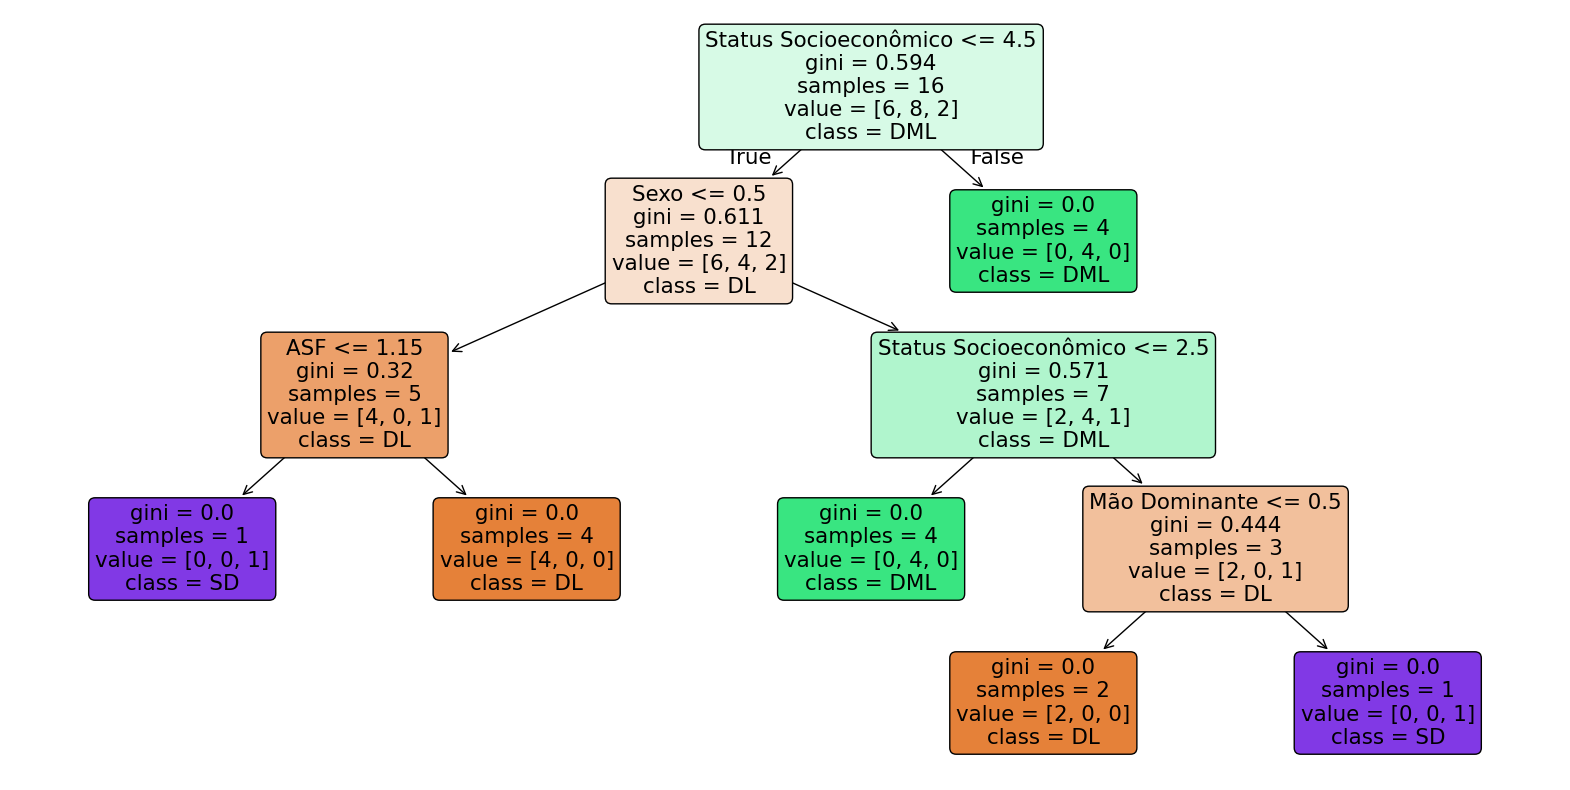

In [21]:
# Visualizando a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=list(X.columns), class_names=list(tree.classes_), filled=True, rounded=True)
plt.show()

In [22]:
data_new = np.array([[1, 1, 70, 16, 4, 28, 1600, 0.70, 1.2, 2]])

In [23]:
# Fazendo a previsão
predictions_new = tree.predict(data_new)
print("Previsão para o novo exemplo:", predictions_new)

Previsão para o novo exemplo: ['SD']


### Support Vector Machine

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px;">
SVM é um algoritmo de aprendizado supervisionado usado para classificação e regressão. Ele encontra um hiperplano que melhor separa as classes no espaço dos atributos.SVM tenta <b>maximizar a margem entre as classes</b>. Em casos <b>não linearmente separáveis, usa-se o truque do kernel para mapear os dados</b> para um espaço de maior dimensão onde se tornem separáveis.
</div>

<img src="images/svm1.png" width="500" height="200" />
<img src="images/svm2.png" width="500" height="200" />

In [24]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)

In [25]:
# Calculando a acurácia do SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Acurácia do SVM:", svm_accuracy)

Acurácia do SVM: 0.25


In [26]:
data_new = np.array([[1, 1, 70, 16, 4, 28, 1600, 0.70, 1.2, 2]])

In [27]:
# Fazendo previsão
predictions_new = svm.predict(data_new)
print("Previsão para o novo exemplo com SVM:", predictions_new)

Previsão para o novo exemplo com SVM: ['DML']


# Não Supervisionado

### KMeans Clustering

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px;">
K-Means é um algoritmo de aprendizado não supervisionado usado para agrupar dados em k clusters baseados em suas características. O algoritmo <b>atribui iterativamente cada ponto de dados ao cluster mais próximo, recalculando os centróides</b> até que a convergência seja alcançada.
</div>

<img src="images/kmeans.png" width="500" height="200" />

Observe que **NÃO** é passado um conjunto **TARGET** para o algoritmo não supervisionado.

In [28]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
clusters = kmeans.predict(X)

Como KMeans é um algoritmo de clustering, você **não pode usar diretamente a métrica de acurácia, pois não há rótulos verdadeiros para comparar**. No entanto, você pode avaliar a qualidade dos clusters usando métricas como o **Silhouette Score** ou **Davies-Bouldin Score**.

O Silhouette Score mede a **similaridade de um ponto INDIVIDUALMETE com outros pontos no mesmo cluster (coesão) em comparação com pontos em clusters diferentes (separação)**. Um Silhouette Score alto (próximo de 1) indica que os clusters são bem definidos.

<img src="images/silhouette.png" width="300" height="100" />

Davies-Bouldin Score mede a **relação entre a coesão (compacidade) de um CLUSTER e a separação entre clusters**.  Um Davies-Bouldin Score mais baixo indica clusters mais compactos e bem separados, o que implica uma melhor qualidade dos clusters.

<img src="images/davies-bouldin.png" width="300" height="100" />


In [29]:
# Calculando o Silhouette Score
kmeans_silhouette = silhouette_score(X, clusters)
print("Silhouette Score do KMeans:", kmeans_silhouette)

Silhouette Score do KMeans: 0.7507379156425191


In [30]:
# Calculando o Davies-Bouldin Score
kmeans_davies_bouldin = davies_bouldin_score(X, clusters)
print("Davies-Bouldin Score do KMeans:", kmeans_davies_bouldin)

Davies-Bouldin Score do KMeans: 0.3333532952264354


In [31]:
data_new = np.array([[1, 1, 70, 16, 4, 28, 1600, 0.70, 1.2, 2]])

In [32]:
# Fazendo a previsão
predictions_new = kmeans.predict(data_new)
print("Previsão para o novo exemplo:", predictions_new)

Previsão para o novo exemplo: [3]


In [33]:
df.head()

,ID,Sexo,Mão Dominante,Idade,Nível de Educação,Status Socioeconômico,MMSE,eTIV,nWBV,ASF,Delay,CDR
0,1,1,0,75,12,3,25,1500,0.68,1.2,0,DML
1,2,0,1,80,16,4,30,1600,0.70,1.1,2,SD
2,3,1,0,65,14,2,40,1950,0.86,1.9,1,DML
3,4,0,0,70,10,1,24,1480,0.65,1.2,3,DL
4,5,1,1,85,18,5,28,1570,0.69,1.1,4,DML


In [34]:
# Adicionando a coluna CDR_cluster ao dataframe
X['CDR_cluster'] = clusters
X.head()

,Sexo,Mão Dominante,Idade,Nível de Educação,Status Socioeconômico,MMSE,eTIV,nWBV,ASF,Delay,CDR_cluster
0,1,0,75,12,3,25,1500,0.68,1.2,0,2
1,0,1,80,16,4,30,1600,0.70,1.1,2,3
2,1,0,65,14,2,40,1950,0.86,1.9,1,0
3,0,0,70,10,1,24,1480,0.65,1.2,3,2
4,1,1,85,18,5,28,1570,0.69,1.1,4,1


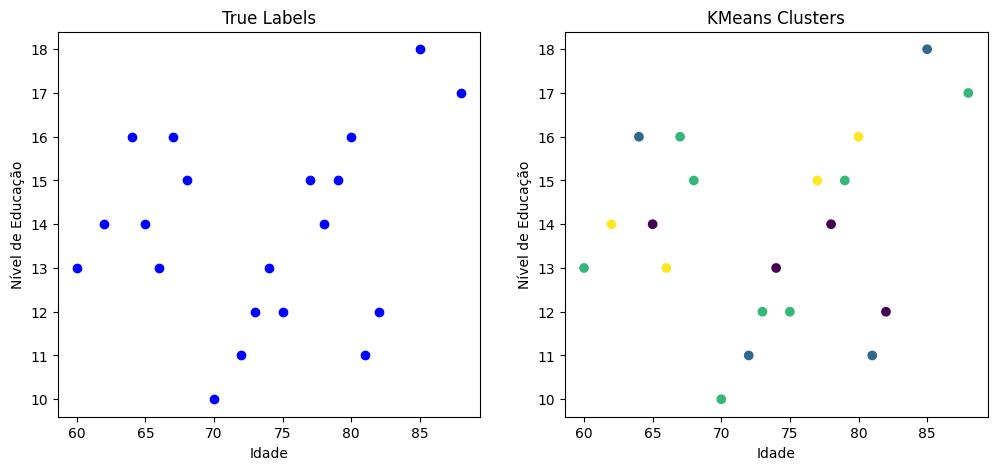

In [35]:
# Visualizando os resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X['Idade'], X['Nível de Educação'], c='blue', label='True Labels')
plt.title('True Labels')
plt.xlabel('Idade')
plt.ylabel('Nível de Educação')

plt.subplot(1, 2, 2)
plt.scatter(X['Idade'], X['Nível de Educação'], c=clusters, cmap='viridis', label='KMeans Clusters')
plt.title('KMeans Clusters')
plt.xlabel('Idade')
plt.ylabel('Nível de Educação')

plt.show()

# Referência para estudo:

*  Grus, Joel. **Data Science do Zero**. Alta Books, 2021
*  Bari, Anasse; Chaouchi, Mohamed; Jung, Tommy. **Análise Preditiva para Leigos**. Alta Books, 2019
